### Data Preprocessing 

In [2]:
import pandas as pd

In [3]:
# ! pip install --upgrade torch transformers

**Load the CSV file we cleaned in the previous notebook**

In [5]:
df = pd.read_csv('cleaned_df.csv')

**Take a brief look at the first few rows of our dataframe. Look at the columns to ensure all our variables we need for our model are here**

In [7]:
df.head()

,Name,City,State,Zip,NAICS_U.S._Industry_Title,Loan_Term,Number_Of_Employees,Business_Type,Urban_Rural_Status,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,Loan_Status,SBA_Approved_Amount,Franchise_Status,Month_Of_Approval
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,RetailTrade,84,4,New,Unknown,0,1,60000,1,48000,0,February
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,Accommodation_FoodServices,60,2,New,Unknown,0,1,40000,1,32000,0,February
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,HealthCare_SocialAssistance,180,7,Existing,Unknown,0,0,287000,1,215250,0,February
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,Unknown,60,2,Existing,Unknown,0,1,35000,1,28000,0,February
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,Unknown,240,14,Existing,Unknown,0,0,229000,1,229000,0,February


**Look each class's frequency (default, paid in full). Is there a class imbalance?**

*Yes, there is a class imbalance. There are about 6 times more 1s (paid in full) than 0s (default). Our model may be better at predicting 1s than 0s. This means the specificity rate will likely be low because there are less 0s to train on. We can either add weights or oversample the 0s to raise our ability to predict 0s when we create out model. Keep this in mind as we move on with this notebook!*

In [10]:
df['Loan_Status'].value_counts()

Loan_Status
1    723540
0    149379
Name: count, dtype: int64

*As you can see, there is another class named 'Unknown'. We will drop this because this information does not provide the model with a lot of value, especially since there is a very low amount of 'Unknowns'. Moreover, an unknown class should be removed because it lacks consistent patterns, contributes no actionable information, skews model metrics, exacerbates class imbalance, confuses interpretation, and introduces noise that degrades overall model performance.*

**Unknown Class is now removed**

In [13]:
df['Loan_Status'].value_counts()

Loan_Status
1    723540
0    149379
Name: count, dtype: int64

**Look at data types of all of our categories.**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872919 entries, 0 to 872918
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Name                            872906 non-null  object
 1   City                            872889 non-null  object
 2   State                           872906 non-null  object
 3   Zip                             872919 non-null  int64 
 4   NAICS_U.S._Industry_Title       872919 non-null  object
 5   Loan_Term                       872919 non-null  int64 
 6   Number_Of_Employees             872919 non-null  int64 
 7   Business_Type                   872790 non-null  object
 8   Urban_Rural_Status              872919 non-null  object
 9   Revolving_Line_Of_Credit        872919 non-null  int64 
 10  Low_Documentation_Loan_Program  872919 non-null  int64 
 11  Disbursement_Gross              872919 non-null  int64 
 12  Loan_Status                   

*We are going to convert most of the objects to dummy variables later since they are categorical. However, we need to change Revolving Line of Credit ,Loan Status, and Low Documentation Loan Program into ints because we will keep these columns as is.*

**Make sure numerical columns that are represented by (0,1) have 0s and 1s . The ML classification models we are using can only process numbers and they would not be able to process strings/objects.**

**Do the same for Revolving Line of Credit**

In [19]:
df['Revolving_Line_Of_Credit'].value_counts()

Revolving_Line_Of_Credit
0    673161
1    199758
Name: count, dtype: int64

**Do the same for Low Documentation Loan Program**

In [21]:
df['Low_Documentation_Loan_Program'].value_counts()

Low_Documentation_Loan_Program
0    764923
1    107996
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872919 entries, 0 to 872918
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Name                            872906 non-null  object
 1   City                            872889 non-null  object
 2   State                           872906 non-null  object
 3   Zip                             872919 non-null  int64 
 4   NAICS_U.S._Industry_Title       872919 non-null  object
 5   Loan_Term                       872919 non-null  int64 
 6   Number_Of_Employees             872919 non-null  int64 
 7   Business_Type                   872790 non-null  object
 8   Urban_Rural_Status              872919 non-null  object
 9   Revolving_Line_Of_Credit        872919 non-null  int64 
 10  Low_Documentation_Loan_Program  872919 non-null  int64 
 11  Disbursement_Gross              872919 non-null  int64 
 12  Loan_Status                   

**Make sure Franchise Status is 0s and 1s and in INT form**

In [24]:
df['Franchise_Status'].value_counts()

Franchise_Status
0    821927
1     50992
Name: count, dtype: int64

*Yes, it is*

**Check for NULL values**

In [27]:
df.shape

(872919, 16)

In [28]:
df.isna().sum()

Name                               13
City                               30
State                              13
Zip                                 0
NAICS_U.S._Industry_Title           0
Loan_Term                           0
Number_Of_Employees                 0
Business_Type                     129
Urban_Rural_Status                  0
Revolving_Line_Of_Credit            0
Low_Documentation_Loan_Program      0
Disbursement_Gross                  0
Loan_Status                         0
SBA_Approved_Amount                 0
Franchise_Status                    0
Month_Of_Approval                   0
dtype: int64

*Low amount of N/A values. Best to drop the row with these N/A values. We have enough data, where dropping these would not make much of an effect on the amount of data the model is trained on.*

In [30]:
df = df.dropna()

In [31]:
df.shape

(872734, 16)

*We dropped 185 rows*

**Check to make sure there are no more NULL values in the data set, and that our .dropna() worked in our previous code.**

In [34]:
df.isna().sum()

Name                              0
City                              0
State                             0
Zip                               0
NAICS_U.S._Industry_Title         0
Loan_Term                         0
Number_Of_Employees               0
Business_Type                     0
Urban_Rural_Status                0
Revolving_Line_Of_Credit          0
Low_Documentation_Loan_Program    0
Disbursement_Gross                0
Loan_Status                       0
SBA_Approved_Amount               0
Franchise_Status                  0
Month_Of_Approval                 0
dtype: int64

**Reset the index to ensure we can accurately map back to the validation set later. This step is crucial to prevent index shuffling during data partitioning, allowing us to correctly associate the disbursement gross with the corresponding business loan in order to calculate net profit from each loan in the validation set.**

*When we reset the index, it creates a new column named 'index' that is not a natural index. This means we can refer back to it later to trace the original row positions or restore the initial indexing if needed.*

*Drop = False means we do not drop the natural index and inplace = True makes the changes in the current dataframe, 'df'*

In [38]:
df.reset_index(drop=False, inplace=True)

*Check to see if new column 'index' was made*

In [40]:
df.head()

,index,Name,City,State,Zip,NAICS_U.S._Industry_Title,Loan_Term,Number_Of_Employees,Business_Type,Urban_Rural_Status,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,Loan_Status,SBA_Approved_Amount,Franchise_Status,Month_Of_Approval
0,0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,RetailTrade,84,4,New,Unknown,0,1,60000,1,48000,0,February
1,1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,Accommodation_FoodServices,60,2,New,Unknown,0,1,40000,1,32000,0,February
2,2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,HealthCare_SocialAssistance,180,7,Existing,Unknown,0,0,287000,1,215250,0,February
3,3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,Unknown,60,2,Existing,Unknown,0,1,35000,1,28000,0,February
4,4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,Unknown,240,14,Existing,Unknown,0,0,229000,1,229000,0,February


*Yes, 'index' is now a column*

**Drop City and Zip Columns.**

*There are too many different cities and zip codes. Our model can not handle this many. State is a good representation for location because there are only 51 different states.*

In [44]:
new_df = df.drop(columns = ['City', 'Zip'])

**Rename the our dependent variable column from 'Loan Status (0,1)' to 'Paid in Full'**

*This makes our variable more clear. 0 means it is not paid in full, or **no** (default) and 1 is "**yes**"*

In [47]:
new_df.rename(columns={'Loan_Status': 'Paid in Full'}, inplace=True)

### Model Preprocessing

#### 1. Overfit Small Sample

*Taking a small subset to overfit on serves a specific purpose in model development: to verify if the model can actually learn and memorize patterns effectively.The goal with the small subset is just to see if the model can **memorize the data**, not to achieve generalization or balanced performance across classes.*

When overfitting on a small subset, you can confirm the model is capable of learning effectively if:

Metrics (e.g., Accuracy) are close to 1.000 (when evaluating classification), meaning the model predicts all samples in the subset correctly.
Training Loss is very low, ideally close to zero, indicating that the model’s predictions closely match the true values.
These signs show that the model has the capacity to learn patterns in the data. Achieving these results on a small subset suggests that, with further tuning and regularization, **the model can likely perform well on larger datasets and unseen data when you begin training in earnest.**

**Load Packages**

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

**Separate Predictors from Dependent Variable**

In [55]:
X = new_df.drop(columns = ['index','Paid in Full', 'Name'])

In [56]:
y = new_df['Paid in Full']

**Partition Data into Training and Validation Sets**

In [58]:
# Step 2: Partition the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)  

### Data Transformation

**Create dummies for categorical variables.**

*Creating dummy variables for classification models like MLPs is essential because they convert categorical data into a numerical format, avoid unintended ordinal relationships, ensure compatibility with activation functions, preserve non-ordinal information, and facilitate proper mapping in the output layer for multi-class predictions.*
                                                                                                                                                                                                                                                                 

*Basically, ML models take in numbers and not words.*

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872734 entries, 0 to 872733
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   index                           872734 non-null  int64 
 1   Name                            872734 non-null  object
 2   City                            872734 non-null  object
 3   State                           872734 non-null  object
 4   Zip                             872734 non-null  int64 
 5   NAICS_U.S._Industry_Title       872734 non-null  object
 6   Loan_Term                       872734 non-null  int64 
 7   Number_Of_Employees             872734 non-null  int64 
 8   Business_Type                   872734 non-null  object
 9   Urban_Rural_Status              872734 non-null  object
 10  Revolving_Line_Of_Credit        872734 non-null  int64 
 11  Low_Documentation_Loan_Program  872734 non-null  int64 
 12  Disbursement_Gross            

In [64]:
X_train = pd.get_dummies(X_train, columns = ['NAICS_U.S._Industry_Title', 'State', 'Urban_Rural_Status', 'Month_Of_Approval', 'Business_Type'])

In [65]:
X_valid = pd.get_dummies(X_valid, columns = ['NAICS_U.S._Industry_Title', 'State', 'Urban_Rural_Status', 'Month_Of_Approval', 'Business_Type'])

*It is better not to use drop_first=True when creating dummies for an MLP neural network.*

*In most other models, we would drop_first = True to prevent overfitting, but neural networks do not need to do this. Neural networks are designed to handle redundancy and overfitting during training through multiple iterations, so retaining all dummies enables the model to fully utilize the data and learn effectively.*

**Take another look at datatypes to guide further preprocessing and ensure our datatypes will be in the correct numerical format for our model**

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698187 entries, 538375 to 121958
Data columns (total 97 columns):
 #   Column                                                                                Non-Null Count   Dtype
---  ------                                                                                --------------   -----
 0   Loan_Term                                                                             698187 non-null  int64
 1   Number_Of_Employees                                                                   698187 non-null  int64
 2   Revolving_Line_Of_Credit                                                              698187 non-null  int64
 3   Low_Documentation_Loan_Program                                                        698187 non-null  int64
 4   Disbursement_Gross                                                                    698187 non-null  int64
 5   SBA_Approved_Amount                                                                   

In [70]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174547 entries, 210651 to 587732
Data columns (total 97 columns):
 #   Column                                                                                Non-Null Count   Dtype
---  ------                                                                                --------------   -----
 0   Loan_Term                                                                             174547 non-null  int64
 1   Number_Of_Employees                                                                   174547 non-null  int64
 2   Revolving_Line_Of_Credit                                                              174547 non-null  int64
 3   Low_Documentation_Loan_Program                                                        174547 non-null  int64
 4   Disbursement_Gross                                                                    174547 non-null  int64
 5   SBA_Approved_Amount                                                                   

*As we can see, we need to convert bool to int. We will do that **after** we normalize our numerical columns*

**Normalize numerical colums in X_train**

In [73]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872734 entries, 0 to 872733
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   index                           872734 non-null  int64 
 1   Name                            872734 non-null  object
 2   State                           872734 non-null  object
 3   NAICS_U.S._Industry_Title       872734 non-null  object
 4   Loan_Term                       872734 non-null  int64 
 5   Number_Of_Employees             872734 non-null  int64 
 6   Business_Type                   872734 non-null  object
 7   Urban_Rural_Status              872734 non-null  object
 8   Revolving_Line_Of_Credit        872734 non-null  int64 
 9   Low_Documentation_Loan_Program  872734 non-null  int64 
 10  Disbursement_Gross              872734 non-null  int64 
 11  Paid in Full                    872734 non-null  int64 
 12  SBA_Approved_Amount           

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross', 'SBA_Approved_Amount']
train_scaled_values = scaler.fit_transform(X_train[columns_to_scale])

In [75]:
# Reassign the scaled values back to the DataFrame
X_train[columns_to_scale] = train_scaled_values

# Check the DataFrame to ensure it has been updated
X_train.head()

,Loan_Term,Number_Of_Employees,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,SBA_Approved_Amount,Franchise_Status,NAICS_U.S._Industry_Title_Accommodation_FoodServices,NAICS_U.S._Industry_Title_Administrative&Support_WasteManagement_RemediationServices,NAICS_U.S._Industry_Title_Agriculture_Forestry_Fishing_Hunting,...,Month_Of_Approval_July,Month_Of_Approval_June,Month_Of_Approval_March,Month_Of_Approval_May,Month_Of_Approval_November,Month_Of_Approval_October,Month_Of_Approval_September,Business_Type_Existing,Business_Type_New,Business_Type_Unknown
538375,1.619406,0.046533,0,0,1.979253,2.714961,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
169651,-0.651078,-0.114371,0,0,0.402843,0.035512,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
726438,2.376234,-0.114371,0,0,-0.012913,-0.008057,0,False,False,False,...,False,False,False,False,True,False,False,True,False,False
844044,2.376234,0.220846,0,0,2.724150,2.573365,0,False,False,False,...,True,False,False,False,False,False,False,True,False,False
575471,-0.348347,-0.100963,0,0,-0.601901,-0.543947,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


**Normalize numerical colums in X_valid**

In [77]:
valid_scaled_values = scaler.fit_transform(X_valid[columns_to_scale])
# Reassign the scaled values back to the DataFrame
X_valid[columns_to_scale] = valid_scaled_values
# Check the DataFrame to ensure it has been updated
X_valid.head()

,Loan_Term,Number_Of_Employees,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,SBA_Approved_Amount,Franchise_Status,NAICS_U.S._Industry_Title_Accommodation_FoodServices,NAICS_U.S._Industry_Title_Administrative&Support_WasteManagement_RemediationServices,NAICS_U.S._Industry_Title_Agriculture_Forestry_Fishing_Hunting,...,Month_Of_Approval_July,Month_Of_Approval_June,Month_Of_Approval_March,Month_Of_Approval_May,Month_Of_Approval_November,Month_Of_Approval_October,Month_Of_Approval_September,Business_Type_Existing,Business_Type_New,Business_Type_Unknown
210651,2.371676,-0.084932,0,0,-0.508757,-0.467214,0,False,False,False,...,False,False,False,False,True,False,False,True,False,False
759808,0.102310,0.008104,0,0,0.084890,0.136358,0,False,False,False,...,False,False,False,True,False,False,False,True,False,False
573055,1.615220,0.047977,0,0,3.011469,4.056927,0,False,False,False,...,False,False,False,False,False,True,False,True,False,False
832891,2.384283,-0.084932,0,0,0.682010,0.655218,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
472470,-0.792828,-0.018477,0,0,-0.428910,-0.357795,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [78]:
# Convert only boolean columns to integers (0s and 1s)
X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X_valid = X_valid.applymap(lambda x: int(x) if isinstance(x, bool) else x)

C:\Users\dylan\AppData\Local\Temp\ipykernel_78472\4139230606.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
C:\Users\dylan\AppData\Local\Temp\ipykernel_78472\4139230606.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_valid = X_valid.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [79]:
X_train.head()

,Loan_Term,Number_Of_Employees,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,SBA_Approved_Amount,Franchise_Status,NAICS_U.S._Industry_Title_Accommodation_FoodServices,NAICS_U.S._Industry_Title_Administrative&Support_WasteManagement_RemediationServices,NAICS_U.S._Industry_Title_Agriculture_Forestry_Fishing_Hunting,...,Month_Of_Approval_July,Month_Of_Approval_June,Month_Of_Approval_March,Month_Of_Approval_May,Month_Of_Approval_November,Month_Of_Approval_October,Month_Of_Approval_September,Business_Type_Existing,Business_Type_New,Business_Type_Unknown
538375,1.619406,0.046533,0,0,1.979253,2.714961,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
169651,-0.651078,-0.114371,0,0,0.402843,0.035512,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
726438,2.376234,-0.114371,0,0,-0.012913,-0.008057,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
844044,2.376234,0.220846,0,0,2.724150,2.573365,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
575471,-0.348347,-0.100963,0,0,-0.601901,-0.543947,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
X_valid.head()

,Loan_Term,Number_Of_Employees,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,SBA_Approved_Amount,Franchise_Status,NAICS_U.S._Industry_Title_Accommodation_FoodServices,NAICS_U.S._Industry_Title_Administrative&Support_WasteManagement_RemediationServices,NAICS_U.S._Industry_Title_Agriculture_Forestry_Fishing_Hunting,...,Month_Of_Approval_July,Month_Of_Approval_June,Month_Of_Approval_March,Month_Of_Approval_May,Month_Of_Approval_November,Month_Of_Approval_October,Month_Of_Approval_September,Business_Type_Existing,Business_Type_New,Business_Type_Unknown
210651,2.371676,-0.084932,0,0,-0.508757,-0.467214,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
759808,0.102310,0.008104,0,0,0.084890,0.136358,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
573055,1.615220,0.047977,0,0,3.011469,4.056927,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
832891,2.384283,-0.084932,0,0,0.682010,0.655218,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
472470,-0.792828,-0.018477,0,0,-0.428910,-0.357795,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Model Training

#### Set up model + test it on a small subset of data 

**Take small sample size (1000 samples) from training set to oversample on**

I am testing the neural network on a small sample size first to see if it can overfit the data because that tells me whether the model is capable of learning the patterns effectively. If it learns the small dataset really well and achieves near-perfect accuracy, it means the architecture and training setup (like the optimizer, activation functions, etc.) are working properly.

In [85]:
small_sample_size = 1000  # Use a random sample of 1000 rows
X_train_small = X_train.sample(n=small_sample_size, random_state=42)
y_train_small = y_train[X_train_small.index]

In [86]:
X_train_small.shape

(1000, 97)

In [87]:
y_train_small.value_counts()

Paid in Full
1    823
0    177
Name: count, dtype: int64

**Convert X_train_small and y_train_small into Pytorch tensors**

Why do we convert to Pytorch tensors?
For neural networks in PyTorch, data needs to be in tensor format because:
- Compatibility: PyTorch models and layers expect inputs, outputs, and weights in tensor format.
- Automatic Differentiation: Tensors support autograd, which is necessary for calculating gradients during backpropagation.
- GPU Support: Tensors can be easily moved to a GPU, making training faster and more efficient.

Keeping this in mind as we set up the rest of the code for our model, it is important to understand that the input tensor typically needs to be in 2D dimensions, structured as:

- Shape: [batch_size, num_features]
- batch_size: The number of samples in each batch (e.g., 32, 64).
- num_features: The number of features per sample (e.g., the number of columns in your dataset).

**How will we choose our arguments when converting our data into Pytorch tensors?**

*We input .values in the first argument because we can only input the raw numeric data. Converting it into a numpy array gets rid of the metadata from our dataframes. For our datatypes, we used **float32** for our features because neural network computations require continuous numeric data. We used **long** for our y (labels) because it needs to be in this format for our classification loss function.*

In [93]:
# Convert data to PyTorch tensors
X_train_tensor_small = torch.tensor(X_train_small.values, dtype=torch.float32)
y_train_tensor_small = torch.tensor(y_train_small.values, dtype=torch.long)

**Create Dataloaders**

TensorDataset: 
- Wraps the features (X_train_tensor) and labels (y_train_tensor) together, so each sample contains both the input data and the target label.
- This allows us to easily work with the pairs of input-output data (e.g., a row of features with its corresponding label), which is essential for supervised learning.

In [96]:
# Make training set by combining inputs (x) and output (y) into one dataset
train_dataset_small = TensorDataset(X_train_tensor_small, y_train_tensor_small)

I chose a batch size of 32 because it’s well-suited for training on a smaller subset of data, offering efficient memory usage, frequent weight updates for faster convergence, and balancing speed with model performance, all while fitting comfortably within common GPU memory limits.

**Why do we need a dataloader and how did I choose my arguments?**

A DataLoader in PyTorch is a tool that efficiently handles data loading during training or evaluation. It:

1. Splits data into batches for processing.
2. Shuffles data to prevent order bias during training.
3. Uses multi-threading for faster data loading, especially with large datasets.
4. Supports custom datasets for dynamic preprocessing and augmentation.
    
It simplifies workflows by automating these tasks, ensuring efficient and scalable data handling.

- train_dataset_small: The dataset we created above, containing both inputs and labels in one dataset.
- batch_size=32: Specifies the number of samples per batch. Here, it means each batch will contain 32 rows (samples) at a time. This allows the model to process data in small, manageable chunks.
- shuffle=True: Shuffles the data at the start of each epoch, which helps the model generalize better by preventing it from learning any patterns due to the order of the data.

In [101]:
# Create DataLoaders
train_loader_small = DataLoader(train_dataset_small, batch_size=32, shuffle=True)

**Define a simple neural network**

Keep the architecture simple to see if the model can learn on the small subset without making it overly complex.
This setup will help us test the model’s ability to overfit without adding unnecessary complexity.

**We are going to use ReLu as our activation function. Why?**
- Non-linearity: ReLU introduces non-linearity to the model, allowing it to learn complex patterns rather than just simple linear relationships.
- Efficient Computation: ReLU is simple and fast to compute, which speeds up training.
- Reduces Vanishing Gradient Problem: Compared to other activation functions (like sigmoid or tanh), ReLU helps prevent the vanishing gradient problem. This means gradients remain large enough for effective backpropagation, allowing the model to learn better.
*The vanishing gradient problem occurs when gradients in a neural network become very small (close to zero) as they are backpropagated through layers, especially in deep networks with many layers. When gradients vanish, it means the model’s parameters (weights) aren’t updated effectively during training, which can prevent the network from learning.*

**We are going to have 3 layers because it performed the best. How did we choose our neurons?**
In this model:
- 64 neurons in the first layer capture a broad set of features from the input data.
- 48 neurons reduces the size and takes the most important patterns the model learned from the first layer.
- 32 neurons in the third layer reduce the size, focusing on the most important patterns the model learned from the second layer.

This gradual reduction helps the network process information in stages, extracting and condensing useful features. Reducing the neurons between layers also:
- Saves computation: Fewer neurons require fewer calculations.
- Reduces overfitting: A more compact second and third layer helps avoid overfitting on small datasets by limiting the model’s capacity.

These numbers (64, 48, 32) are standard and effective starting points, balancing model complexity and performance. 

**How will we structure our code for our model definitions?**

**First Layer (fc1):**

- Type: Fully connected (or dense) layer.
- Input Size: input_size (the number of features in your input data).
- Output Size: 64 neurons.
- Function: Takes the input data and passes it through 64 neurons, producing 64 outputs.

**Activation Layer (relu):**

- Type: ReLU (Rectified Linear Unit) activation function.
- Function: Applies non-linearity to the output of fc1, helping the model learn complex patterns.

**Second Layer (fc2):**

- Type: Fully connected (dense) layer.
- Input Size: 64 (from the previous layer’s output).
- Output Size: 48 neurons.
- Function: Takes the 64 outputs from the first layer, processes them, and produces 48 outputs.

**Second Activation Layer (relu):**

- Type: ReLU activation function.
- Function: Adds non-linearity again to the output of fc2.

**Third Layer (fc3):**

- Type: Fully connected (dense) layer.
- Input Size: 48 (from the previous layer’s output).
- Output Size: 32 neurons.
- Function: Takes the 48 outputs from the first layer, processes them, and produces 32 outputs.

**Third Activation Layer (relu):**

- Type: ReLU activation function.
- Function: Adds non-linearity again to the output of fc3.

**Output Layer (output):**

- Type: Fully connected (dense) layer.
- Input Size: 32 (from the previous layer’s output).
- Output Size: 2 neurons.
- Purpose: Produces 2 outputs, one for each class in a binary classification problem

In [109]:
# Step 5: Define a simple neural network with an additional layer
class SimpleMLP(nn.Module):
    def __init__(self, input_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # First hidden layer
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 48)  # second layer
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(48, 32)  # third hidden layer
        self.output = nn.Linear(32, 2)  # Output layer for binary classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)  # Pass through the new layer
        x = self.relu2(x)
        x = self.fc3(x) # Pass through the new layer
        x = self.output(x)
        return x



**Define "input size" variable by getting the number columns from the training X set**
- X_train_tensor.shape[1] gives the number of features (columns) in the input data X_train_tensor.
- input_size stores this number, which is needed to define the first layer of the model so it knows how many inputs to expect.

In [111]:
input_size = X_train_tensor_small.shape[1]

**Initialize the Model**
- SimpleMLP(input_size) creates an instance of the neural network model (the SimpleMLP class).
- input_size is passed to the model to configure the number of inputs in the first layer

In [113]:
model = SimpleMLP(input_size)

**We are going to assign weights to our classes. Keeping in mind the large class imbalance (less 0s than 1s), we want our model to perform well on 0s as well. In order to do this, we will assign weights.**

*After running our model on multiple weights, we found that [2.5, 0.5] were the optimal weight parameters. This means that the model will give class 0 has 2.5x  more importance to errors in classifying samples of class 0. 0.5 for class 0 means the model will consider 1 as half as important compared to class 1.*

*Basically, this means that the model will pay more attention to 0s than 1s, which will make our model perform better on predicting 0s.*

*We also tried oversampling to have our model detect 0s better, but that led to overfitting due to the large amount of synthetic data that was created using SMOTE that was not truly accurate. We are sticking to weights only to optimize our specificity metric.*

In [118]:
import torch
import torch.nn as nn
# Assign higher weight to class 0
class_weights = torch.tensor([2.5, 0.5], dtype=torch.float32)  # Higher weight for class 0, lower for class 1

**Initialize Loss Function**
- nn.CrossEntropyLoss() is the loss function, which measures how well the model’s predictions match the actual labels for classification tasks.
- This loss function is commonly used for multi-class and binary classification, as it calculates the difference between the predicted class probabilities and the actual class.

In [120]:
criterion = nn.CrossEntropyLoss(weight = class_weights)

**Initialize Optimizers**

An optimizer updates the weights of a neural network to minimize the loss, using gradients calculated during backpropagation. Adam is a popular optimizer because it adapts learning rates, which makes it efficient and easy to use for many tasks.

*What is the Learning Rate (lr)?*
- The learning rate is a key hyperparameter that controls how much the model's weights are adjusted in response to the calculated error (loss) during each update. It’s essentially the "step size" the model takes toward minimizing the loss:

- Higher Learning Rate: The model takes larger steps in updating weights, which can speed up training but risks overshooting the optimal weights and potentially never converging.
- Lower Learning Rate: The model takes smaller steps, which is safer and more precise but can slow down training. If it’s too low, the model might get stuck or take too long to reach optimal weights.

- Learning Rate (lr=0.001): Controls the size of updates. 0.001 is a common and safe starting point for Adam.
- Start with 0.001: If training is too slow, try 0.01; if unstable, try 0.0001.
- Goal: Find a learning rate that allows steady convergence without oscillation

*What .parameters() Does*
- model.parameters() retrieves a collection (usually a list) of all the parameters in your neural network (like weights and biases in each layer).
- Each layer in a neural network has its own set of weights and biases, and model.parameters() gathers them all together.
- By passing model.parameters() to the optimizer, you’re telling it, "These are the parameters I want you to adjust to minimize the loss."
- The optimizer will use the gradients (calculated during backpropagation) to update these parameters.
- When you call .step() on the optimizer, it will automatically adjust all the parameters from model.parameters() based on the gradients.

In [126]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

**Train the Model on the SMALL test sample (1000 rows)**

Each Epoch:

- During each epoch, the model goes through all 1,000 samples in batches of 32 until it has processed the entire dataset.
- After one epoch, the model will have seen every sample in the dataset once.

Training for Multiple Epochs:

- Training for 50 epochs would mean the model sees all 1,000 samples 50 times (repeating the batches of 32 each time).

- Start with **more epochs for small datasets** to help the model learn basic patterns.
- Reduce epochs as data increases to avoid overfitting, improve efficiency, and leverage the learning benefits of larger datasets.

*In summary, an epoch is one round of learning on the entire dataset. 
More epochs give the model more chances to learn patterns. We are going to give it a lot of epochs because we want to see if it can overfit*

In [132]:
# Step 5: Train the model on the small training sample
epochs = 50  # Train for enough epochs to overfit (i.e., memorize the small sample data)
for epoch in range(epochs):
    model.train()  # Set the model to training mode (enables certain layers like dropout, if present)
    total_loss = 0  # Initialize total loss for the epoch to calculate average loss later
    
    # Loop through each batch in the training loader
    for inputs, labels in train_loader_small:
        optimizer.zero_grad()  # Clear gradients from the previous batch to prevent accumulation
        outputs = model(inputs)  # Perform a forward pass to get model predictions
        loss = criterion(outputs, labels)  # Calculate the loss by comparing predictions to actual labels
        loss.backward()  # Perform backpropagation to compute gradients of the loss w.r.t. model parameters
        optimizer.step()  # Update model parameters using the gradients to minimize loss
        
        total_loss += loss.item()  # Accumulate batch loss to calculate the epoch's average loss
    
    # Print average loss for the epoch to monitor model's performance
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader_small):.4f}')

Epoch [1/50], Loss: 0.6726
Epoch [2/50], Loss: 0.5764
Epoch [3/50], Loss: 0.4909
Epoch [4/50], Loss: 0.4248
Epoch [5/50], Loss: 0.3799
Epoch [6/50], Loss: 0.3594
Epoch [7/50], Loss: 0.3115
Epoch [8/50], Loss: 0.2851
Epoch [9/50], Loss: 0.2674
Epoch [10/50], Loss: 0.2203
Epoch [11/50], Loss: 0.1776
Epoch [12/50], Loss: 0.1569
Epoch [13/50], Loss: 0.1240
Epoch [14/50], Loss: 0.1044
Epoch [15/50], Loss: 0.0898
Epoch [16/50], Loss: 0.0906
Epoch [17/50], Loss: 0.0765
Epoch [18/50], Loss: 0.0565
Epoch [19/50], Loss: 0.0474
Epoch [20/50], Loss: 0.0350
Epoch [21/50], Loss: 0.0316
Epoch [22/50], Loss: 0.0236
Epoch [23/50], Loss: 0.0304
Epoch [24/50], Loss: 0.0185
Epoch [25/50], Loss: 0.0140
Epoch [26/50], Loss: 0.0095
Epoch [27/50], Loss: 0.0080
Epoch [28/50], Loss: 0.0060
Epoch [29/50], Loss: 0.0049
Epoch [30/50], Loss: 0.0034
Epoch [31/50], Loss: 0.0026
Epoch [32/50], Loss: 0.0021
Epoch [33/50], Loss: 0.0019
Epoch [34/50], Loss: 0.0017
Epoch [35/50], Loss: 0.0017
Epoch [36/50], Loss: 0.0019
E

In [133]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# Calculate metrics for the training set
with torch.no_grad():
    train_predictions = model(X_train_tensor_small)
    predicted_classes_train = torch.argmax(train_predictions, dim=1)
    train_accuracy = accuracy_score(y_train_small, predicted_classes_train.numpy())
    
    # Calculate additional metrics for training set
    train_precision = precision_score(y_train_small, predicted_classes_train.numpy(), average='binary')
    train_recall = recall_score(y_train_small, predicted_classes_train.numpy(), average='binary')
    train_f1 = f1_score(y_train_small, predicted_classes_train.numpy(), average='binary')
    
    # Calculate specificity
    cm_train = confusion_matrix(y_train_small, predicted_classes_train.numpy())
    train_specificity = cm_train[0, 0] / (cm_train[0, 0] + cm_train[0, 1])  # TN / (TN + FP)
    
    print(f"Training accuracy on small sample: {train_accuracy:.4f}")
    print(f"Training Precision: {train_precision:.4f}")
    print(f"Training Recall: {train_recall:.4f}")
    print(f"Training F1 Score: {train_f1:.4f}")
    print(f"Training Specificity: {train_specificity:.4f}")

Training accuracy on small sample: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Training F1 Score: 1.0000
Training Specificity: 1.0000


*Our model overfit perfectly! Our loss function continued to decrease after each epoch and was very low! Our training results were all 100% as well! Our model is ready for the entire dataset*

#### 2. Train on Progressively Larger Batches

**Convert the entire X_train, y_train, X_valid, y_valid into pytorch tensors**

In [137]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

In [138]:
# Convert validation data to tensors
X_val_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_valid.values, dtype=torch.long)

**We are going to  train on progressively larger samples to save resources and improve efficiency.**

Starting with smaller samples:

- Speeds up early training when the model is still learning basic patterns.
- Prevents wasting time on the full dataset if the model isn’t improving (thanks to early stopping).
- Scales better for large datasets, making it manageable in memory-constrained environments.
- Growing the sample size lets the model refine its learning with more data once it’s already trained on smaller subsets.

**Code Set-Up and Thought Process**

1. Initial Setup:
I started by thinking about how to efficiently train a model on a large dataset without overwhelming memory or computational resources. My goal was to start with a small sample of the data and progressively increase the size of the training set. To do this, I initialized:

- A small initial sample size (sample_size = 5000) to begin training.
- A growth_factor to gradually increase the sample size (in this case, doubling it each time).
- Variables like epochs, min_improvement,(0.005), and patience` (3 epochs) for early stopping, so I could stop training if validation performance stopped improving.
By starting small, I could allow the model to learn efficiently on a manageable subset and scale up as the model's capacity improved.

2. Dynamic Sample Sizing:
To manage the data, I designed a loop that slices the dataset into progressively larger subsets. The idea was to:

- Set a start and end index for each subset of data (start_idx to end_idx).
- Check if I’ve reached the end of the dataset or if the sample size exceeds a predefined limit (e.g., 320,000). If so, I would use the remaining data for a final training iteration.
- I also ensured no overlap between slices of data by incrementing the start_idx for each iteration. This way, the model progressively sees more data without redundant processing.

3. Data Preparation:
- For each subset,

    - I sliced the training dataset (X_sample, y_sample) and converted them to PyTorch tensors for compatibility with the model.
    - I used a DataLoader to batch the data, shuffle it during training, and create an efficient pipeline for each sample.
    - I also created a validation DataLoader that remained constant throughout the process, as I wanted to evaluate performance consistently.

4. Training with Early Stopping: In each iteration, I trained the model on the current data subset:

- I entered a loop for a fixed number of epochs (epochs=50) but included early stopping to terminate training early if validation loss stopped improving.

- During training,

    - I used model.train() to enable training-specific layers (e.g., dropout).
    - For each batch in the DataLoader, I:
    - Performed a forward pass to get predictions.
    - Computed the loss and performed backpropagation.
    - Updated model weights using the optimizer.
    - I kept track of the average training loss to monitor performance.
  
- For validation:

    - I switched the model to evaluation mode using model.eval() (disabling dropout and similar layers).
    - I computed the average validation loss for the current subset.
    - I tracked the best validation loss and used a patience counter to determine if early stopping should trigger.
    - Early stopping was important here because I didn’t want to waste time training the model on a subset if it wasn’t improving significantly. If the validation loss didn’t improve by at least min_improvement for patience epochs, I stopped early.

5. Incremental Learning
- Once training on a subset was complete, I:

    - Incremented the start_idx to prepare for the next data slice.
    - Doubled the sample_size (using growth_factor) for the next iteration unless it was the last subset.
    - Checked if I’d used all the training data. If so, I broke out of the loop.
    - By progressively increasing the sample size, the model got a chance to learn from more data without being overwhelmed initially.  It’s like feeding the model data in "digestible chunks."

- Why I Structured It This Way
    - Scalability: I designed this approach to handle large datasets that couldn’t fit into memory all at once. By training on progressively larger subsets, I could scale the process dynamically.

    - Efficiency: Early stopping ensured I didn’t waste time overfitting a small dataset or training on a subset where the model wasn’t improving.

    - Control: By starting with a small sample size and gradually increasing it, I could observe how the model's performance scaled with the amount of training data.

    - Flexibility: This approach adapts to different dataset sizes, stopping when all the data has been used or a predefined limit is reached.

**How It Plays Out**
- Here’s what happens:

    - Initially, the model trains on the first 5,000 samples (sample_size=5000).
    - After a few epochs (or early stopping), I expand the training set by doubling the sample size (sample_size=10,000).
    - This continues until all the data is processed or the sample size reaches a predefined cap.
    - At each step, the model learns progressively, and validation loss is used to monitor whether training is effective.

**Example Scenario**
- Inputs:
    - Suppose I have 100,000 rows of data (len(X_train) = 100,000).
    - My initial sample_size = 5,000 and growth_factor = 2.
    - Iterations:
- Iteration 1:

    - Train on rows 0-4,999 (5,000 samples).
    - Early stopping may kick in after a few epochs.
    - Validation loss improves, so I move to the next subset.
- Iteration 2:

    - Train on rows 5,000-14,999 (10,000 samples).
    - The model trains longer, but early stopping ensures it doesn’t overfit.
- Final Iteration:

    - When only 15,000 rows are left, I train on all remaining data.
    - After training, the loop exits.

In [144]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split

# Initialize starting sample size and growth factor
sample_size = 5000
growth_factor = 2
start_idx = 0  # Start index for each new sample
epochs = 50  # Set a high number of epochs to allow early stopping
min_improvement = 0.005  # Minimum improvement threshold
patience = 3  # Number of epochs to wait for improvement

# Dynamically determine the number of iterations needed
while start_idx < len(X_train):
    end_idx = start_idx + sample_size
    
    # Check if this is the last iteration based on a threshold (e.g., sample_size >= 320000)
    if end_idx >= len(X_train) or sample_size >= 320000:
        end_idx = len(X_train)  # Use all remaining data
        print(f"Final training with remaining data from row {start_idx} to {end_idx}")
    else:
        print(f"Training with sample size: {sample_size} (from row {start_idx} to {end_idx})")
    
    # Slice the training dataset to avoid overlap
    X_sample = X_train[start_idx:end_idx]
    y_sample = y_train[start_idx:end_idx]
    
    # Convert to tensors
    X_sample_tensor = torch.tensor(X_sample.values, dtype=torch.float32)
    y_sample_tensor = torch.tensor(y_sample.values, dtype=torch.long)
    
    # Create DataLoader for the current sample with shuffling
    train_loader_sample = DataLoader(TensorDataset(X_sample_tensor, y_sample_tensor), batch_size=32, shuffle=True)
    val_loader_sample = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=32, shuffle=False)
    
    # Early stopping variables
    best_val_loss = float('inf')
    epochs_no_improve = 0
    
    # Train the model on this sample size
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader_sample:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_train_loss = total_loss / len(train_loader_sample)
        
        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for val_inputs, val_labels in val_loader_sample:
                val_outputs = model(val_inputs)
                loss = criterion(val_outputs, val_labels)
                val_loss += loss.item()
        avg_val_loss = val_loss / len(val_loader_sample)
        
        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")
        
        # Early stopping condition
        if avg_val_loss < best_val_loss - min_improvement:
            best_val_loss = avg_val_loss
            epochs_no_improve = 0  # Reset the patience counter
        else:
            epochs_no_improve += 1  # Increment patience counter if no improvement
        
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs without sufficient improvement.")
            break
    
    # Move the starting index forward
    start_idx = end_idx

    # Check if we’ve used all data; if so, break the loop
    if end_idx == len(X_train):
        break
    
    # Increase sample size for the next iteration, unless it’s the last iteration
    sample_size *= growth_factor

Training with sample size: 5000 (from row 0 to 5000)
Epoch [1/50], Training Loss: 0.8902, Validation Loss: 0.5452
Epoch [2/50], Training Loss: 0.5012, Validation Loss: 0.5356
Epoch [3/50], Training Loss: 0.4647, Validation Loss: 0.5346
Epoch [4/50], Training Loss: 0.4425, Validation Loss: 0.5342
Epoch [5/50], Training Loss: 0.4228, Validation Loss: 0.5343
Early stopping triggered after 5 epochs without sufficient improvement.
Training with sample size: 10000 (from row 5000 to 15000)
Epoch [1/50], Training Loss: 0.4915, Validation Loss: 0.5031
Epoch [2/50], Training Loss: 0.4618, Validation Loss: 0.4977
Epoch [3/50], Training Loss: 0.4452, Validation Loss: 0.4841
Epoch [4/50], Training Loss: 0.4344, Validation Loss: 0.5119
Epoch [5/50], Training Loss: 0.4212, Validation Loss: 0.5002
Epoch [6/50], Training Loss: 0.4051, Validation Loss: 0.5087
Early stopping triggered after 6 epochs without sufficient improvement.
Training with sample size: 20000 (from row 15000 to 35000)
Epoch [1/50], T

**Overall Trends**
- Training Loss:
    - Consistently decreases across all subsets, showing the model effectively fits the training data.
- Validation Loss:
    - Improves with larger datasets, indicating that the model benefits from more data.
    - Valid Loss continue to decrease with Training Loss and has similar values (with the more data it is trained on). This is good.
    - Early stopping prevents overfitting, ensuring the model maintains its generalization ability.
- Good!

### Training & Validation Metrics + Results

Install and important packages that provide results from our model

In [148]:
#! pip install torchmetrics

In [149]:
import torch
from torchmetrics.classification import Accuracy, Precision, Recall, F1Score

In [150]:
import torch

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

**Training Metrics**

In [152]:
# Initialize metrics for binary classification
accuracy = Accuracy(task="binary").to(device)  # Ensure metrics are on the same device
precision = Precision(task="binary").to(device)
recall = Recall(task="binary").to(device)
f1 = F1Score(task="binary").to(device)

# ----- Training Set Metrics -----
with torch.no_grad():
    model.eval()  # Ensure the model is in evaluation mode
    train_outputs = model(X_train_tensor)  # Get raw model outputs (logits) with shape [N, 2]
    train_predictions = torch.argmax(train_outputs, dim=1)  # Get class predictions (0 or 1)

# Ensure y_train_tensor and train_predictions are on the same device
y_train_tensor = y_train_tensor.to(train_predictions.device)

# Calculate training metrics
train_acc = accuracy(train_predictions, y_train_tensor)
train_prec = precision(train_predictions, y_train_tensor)
train_rec = recall(train_predictions, y_train_tensor)
train_f1_score = f1(train_predictions, y_train_tensor)

# Calculate specificity manually using confusion matrix
from sklearn.metrics import confusion_matrix
train_conf_matrix = confusion_matrix(
    y_train_tensor.cpu().numpy(), train_predictions.cpu().numpy()
)
TN, FP, FN, TP = train_conf_matrix.ravel()
train_specificity = TN / (TN + FP)

# Print the results
print("Training Metrics:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training Precision: {train_prec:.4f}")
print(f"Training Recall: {train_rec:.4f}")
print(f"Training F1 Score: {train_f1_score:.4f}")
print(f"Training Specificity: {train_specificity:.4f}")


Training Metrics:
Training Accuracy: 0.8731
Training Precision: 0.9672
Training Recall: 0.8766
Training F1 Score: 0.9197
Training Specificity: 0.8562


**Validation Metrics**

In [154]:
# ----- Validation Set Metrics -----
with torch.no_grad():
    val_outputs = model(X_val_tensor)  # Get raw model outputs
    val_predictions = torch.argmax(val_outputs, dim=1)  # Convert to predicted classes

# Ensure y_val_tensor and val_predictions are on the same device
y_val_tensor = y_val_tensor.to(val_predictions.device)

# Calculate validation metrics
val_acc = accuracy(val_predictions, y_val_tensor)
val_prec = precision(val_predictions, y_val_tensor)
val_rec = recall(val_predictions, y_val_tensor)
val_f1_score = f1(val_predictions, y_val_tensor)

# Calculate specificity manually using confusion matrix
val_conf_matrix = confusion_matrix(y_val_tensor.cpu().numpy(), val_predictions.cpu().numpy())
TN, FP, FN, TP = val_conf_matrix.ravel()
val_specificity = TN / (TN + FP)

print("\nValidation Metrics:")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Precision: {val_prec:.4f}")
print(f"Validation Recall: {val_rec:.4f}")
print(f"Validation F1 Score: {val_f1_score:.4f}")
print(f"Validation Specificity: {val_specificity:.4f}")


Validation Metrics:
Validation Accuracy: 0.8692
Validation Precision: 0.9641
Validation Recall: 0.8751
Validation F1 Score: 0.9174
Validation Specificity: 0.8404


*This is the best model that balances bias-variance. Moreover, it produces the best financial results, which we will go over later. Both training and validation metrics have about the same metrics, which shows that it does not overfit. Our model also has great precision, which is our most important metric and has a good specificity rate, which is our 2nd most important metric. The specificity rate would have been extremely poor if we did not give it weights. This 83-84% specificity is the highest percentage we could get without overfitting.*

**Cross Validation (ensures no overfitting aka our model performs well on new data)**

In [158]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Convert dataset to tensors
X_tensor = torch.tensor(X_train.values, dtype=torch.float32)  # Features
y_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Labels must be 1D for metrics

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Metrics storage
fold_results = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_tensor)):
    print(f"Fold {fold + 1}")
    
    # Validation data for the current fold
    X_val_fold, y_val_fold = X_tensor[val_idx], y_tensor[val_idx]
    
    # Validation predictions
    model.eval()
    y_val_pred = []
    y_val_true = []
    with torch.no_grad():
        outputs = model(X_val_fold)  # Predictions from pre-trained model
        preds = torch.argmax(outputs, dim=1)  # Convert logits to predicted class
        y_val_pred.extend(preds.cpu().numpy())
        y_val_true.extend(y_val_fold.cpu().numpy())
    
    # Calculate metrics for the current fold
    acc = accuracy_score(y_val_true, y_val_pred)
    prec = precision_score(y_val_true, y_val_pred, zero_division=0)
    rec = recall_score(y_val_true, y_val_pred, zero_division=0)
    f1 = f1_score(y_val_true, y_val_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_val_true, y_val_pred)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0

    print(f"Fold {fold + 1} Metrics:")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}, Specificity: {specificity:.4f}")
    
    fold_results.append((acc, prec, rec, f1, specificity))

# Calculate and display average metrics across folds
avg_metrics = np.mean(fold_results, axis=0)
print("\nCross-Validation Results (Pre-trained Model):")
print(f"Average Accuracy: {avg_metrics[0]:.4f}")
print(f"Average Precision: {avg_metrics[1]:.4f}")
print(f"Average Recall: {avg_metrics[2]:.4f}")
print(f"Average F1 Score: {avg_metrics[3]:.4f}")
print(f"Average Specificity: {avg_metrics[4]:.4f}")


Fold 1
Fold 1 Metrics:
Accuracy: 0.8739, Precision: 0.9670, Recall: 0.8776, F1 Score: 0.9201, Specificity: 0.8559
Fold 2
Fold 2 Metrics:
Accuracy: 0.8733, Precision: 0.9676, Recall: 0.8764, F1 Score: 0.9198, Specificity: 0.8578
Fold 3
Fold 3 Metrics:
Accuracy: 0.8730, Precision: 0.9668, Recall: 0.8766, F1 Score: 0.9195, Specificity: 0.8559
Fold 4
Fold 4 Metrics:
Accuracy: 0.8738, Precision: 0.9678, Recall: 0.8771, F1 Score: 0.9202, Specificity: 0.8572
Fold 5
Fold 5 Metrics:
Accuracy: 0.8716, Precision: 0.9666, Recall: 0.8752, F1 Score: 0.9187, Specificity: 0.8544

Cross-Validation Results (Pre-trained Model):
Average Accuracy: 0.8731
Average Precision: 0.9672
Average Recall: 0.8766
Average F1 Score: 0.9197
Average Specificity: 0.8562


*Our results show that our model performs on new data. ALl the folds have very similar metrics from each other.*

### Analyze Validation Results (Net Profits, Gains/Lift Charts, ROC Curve)

In [162]:
y_valid = y_valid.reset_index()

In [164]:
# Convert tensors to numpy for DataFrame creation
y_val_np = y_val_tensor.cpu().numpy()  # Convert actual labels to numpy array
val_pred_np = val_predictions.cpu().numpy()  # Convert predictions to numpy array

# Create DataFrame with Actual, Predicted, and Correct (True/False) columns
df_results = pd.DataFrame({
    'index': y_valid['index'],
    'Actual': y_val_np,
    'Predicted': val_pred_np,
    'Correct': y_val_np == val_pred_np  # True if prediction matches actual
})

# Display first 10 rows of the DataFrame
print(df_results.head(10))

    index  Actual  Predicted  Correct
0  210651       1          1     True
1  759808       1          1     True
2  573055       1          1     True
3  832891       1          1     True
4  472470       0          0     True
5  507048       1          1     True
6  241483       0          1    False
7   15632       1          1     True
8  392200       1          0    False
9  867477       1          0    False


In [166]:
# Assuming y_val_np (actual values) and val_pred_np (predicted values) are numpy arrays

# Initialize counters for each category
TP = 0  # True Positive
FP = 0  # False Positive
TN = 0  # True Negative
FN = 0  # False Negative

# Iterate through actual and predicted labels
for actual, predicted in zip(y_val_np, val_pred_np):
    if actual == 1 and predicted == 1:
        TP += 1
    elif actual == 0 and predicted == 1:
        FP += 1
    elif actual == 0 and predicted == 0:
        TN += 1
    elif actual == 1 and predicted == 0:
        FN += 1

# Print the results
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)



True Positives (TP): 126820
False Positives (FP): 4727
True Negatives (TN): 24896
False Negatives (FN): 18104


**Make sure y_valid matches with df_results**

In [169]:
y_valid

,index,Paid in Full
0,210651,1
1,759808,1
2,573055,1
3,832891,1
4,472470,0
...,...,...
174542,299520,1
174543,802635,1
174544,313380,1
174545,577603,1


**Create a new dataframe with the results for each business, as well as its name and disbursement gross**

In [182]:
# Merge predictions with the original DataFrame based on 'index' column in df_results and natural index in df
merged_df = df_results.merge(
    df[['Name', 'Disbursement_Gross']],  # Only retain necessary columns
    left_on='index',  # Use the 'index' column from df_results
    right_index=True,  # Use the natural index of df of the right DataFrame
    how='left'  # Keep all rows in df_results
)


In [184]:
merged_df

,index,Actual,Predicted,Correct,Name,Disbursement_Gross
0,210651,1,1,True,WINDSHIELD REPAIR SYST/SPECIAL,57000
1,759808,1,1,True,"SPORTS SHOE, THE",228000
2,573055,1,1,True,"TEMMERMAN & CILLEY, LLP",1071000
3,832891,1,1,True,GARLICK ENVIRONMENTAL ASSOCIAT,400000
4,472470,0,0,True,NATIONAL MOLDED PRODUCTS,80000
...,...,...,...,...,...,...
174542,299520,1,1,True,CHEF LEE'S MANDARIN HOUSE,1148000
174543,802635,1,1,True,CS44 ACQUISITION CORP DBA SERV,1235723
174544,313380,1,1,True,BIG WEST OILFIELD SERVICES,541934
174545,577603,1,1,True,"N.L. CARGO, INC.",550000


**Make sure natural index in df matches with column 'index' in df_results.**

In [187]:
df.iloc[210651]

index                                                                  210664
Name                                           WINDSHIELD REPAIR SYST/SPECIAL
City                                                               SAN MARCOS
State                                                                      CA
Zip                                                                     92069
NAICS_U.S._Industry_Title         OtherServices(except Public Administration)
Loan_Term                                                                 300
Number_Of_Employees                                                         5
Business_Type                                                        Existing
Urban_Rural_Status                                                    Unknown
Revolving_Line_Of_Credit                                                    0
Low_Documentation_Loan_Program                                              0
Disbursement_Gross                                              

*Yes, we joined on the correct indexes*

**Create a new column calculating 'Profit/Loss' for each business**

At the end of the day, we need to see how much money our model will make/lose for the bank who uses this model. We will set up these calculations based on the criteria

- **If Predicted Paid in Full, Actual Paid in Full**: **Profit** = 5% of DisbursementGross
- **If Predicted Paid in Full, Actual Default**: **Loss** = -5 times 5% of DisbursementGross
    - The formula means:
        - Take 5% of the loan amount.
        - Multiply this amount by 5.
        - Make it negative (indicating a loss).
- **If Predicted Default** (regardless of actual outcome): Profit/Loss = 0
    - This is because the bank chooses to not give the business money, so they do not gain or lose any money.

In [196]:
def calculate_profit_loss(row):
    if row['Predicted'] == 1 and row['Actual'] == 1:
        # Predicted Paid in Full, Actual Paid in Full
        return 0.05 * row['Disbursement_Gross']
    elif row['Predicted'] == 1 and row['Actual'] == 0:
        # Predicted Paid in Full, Actual Default
        return -5 * 0.05 * row['Disbursement_Gross']
    else:
        # Predicted Default (regardless of Actual outcome)
        return 0

# Apply the function to each row of the DataFrame
merged_df['Profit/Loss'] = merged_df.apply(calculate_profit_loss, axis=1)

# Display the first few rows of the DataFrame to verify the calculations
print(merged_df.head())


    index  Actual  Predicted  Correct                            Name  \
0  210651       1          1     True  WINDSHIELD REPAIR SYST/SPECIAL   
1  759808       1          1     True                SPORTS SHOE, THE   
2  573055       1          1     True         TEMMERMAN & CILLEY, LLP   
3  832891       1          1     True  GARLICK ENVIRONMENTAL ASSOCIAT   
4  472470       0          0     True        NATIONAL MOLDED PRODUCTS   

   Disbursement_Gross  Profit/Loss  
0               57000       2850.0  
1              228000      11400.0  
2             1071000      53550.0  
3              400000      20000.0  
4               80000          0.0  


**Average Profit/Loss from each Business Loan Given Out for the Bank**

In [198]:
merged_df['Profit/Loss'].mean()

6416.437117796354

**Total Profit/Loss from all the Business Loans Given Out for the Bank**

In [202]:
merged_df['Profit/Loss'].sum()

1119969849.6000001

#### Normal Distribution Chart

**Remove outliers**

In [206]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the Profit/Loss column
Q1 = merged_df['Profit/Loss'].quantile(0.25)
Q3 = merged_df['Profit/Loss'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
filtered_df = merged_df[(merged_df['Profit/Loss'] >= lower_bound) & (merged_df['Profit/Loss'] <= upper_bound)]

print(f"Original number of rows: {merged_df.shape[0]}")
print(f"Number of rows after removing outliers: {filtered_df.shape[0]}")


Original number of rows: 174547
Number of rows after removing outliers: 154368


**Create Chart**

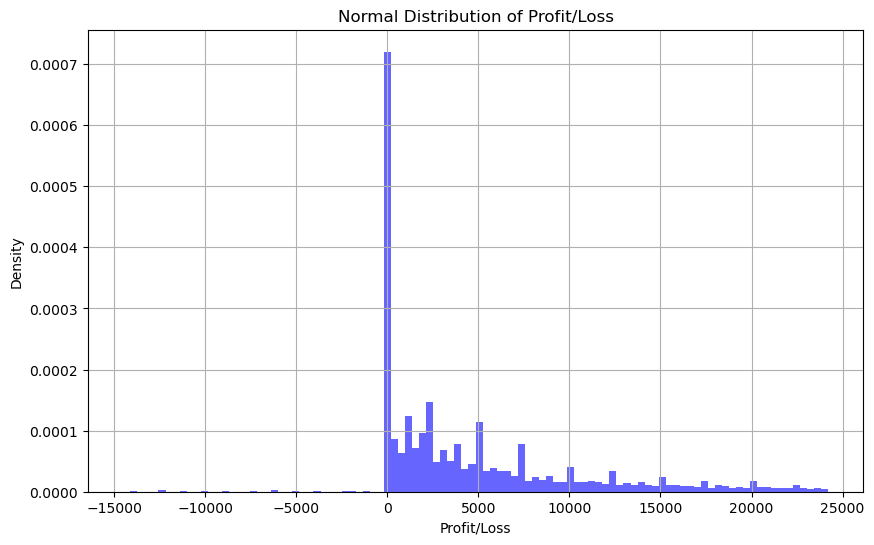

In [209]:
import matplotlib.pyplot as plt

# Plot a normal distribution chart for the 'Profit/Loss' column
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Profit/Loss'], bins=100, density=True, alpha=0.6, color='blue')
plt.title('Normal Distribution of Profit/Loss')
plt.xlabel('Profit/Loss')
plt.ylabel('Density')
plt.grid(True)
plt.show()


*The normal distribution Chart has a majority of its Profit/Loss values right below or above zero. It is skewed to the right, meaning the higher the profit, the less instances there are of those. This is expected. However, if we look on the left side of the chart, there ar very low amounts of instances where there are negative values (losses), which means oour model is good at preventing losses.*

**View the total number of instances where there is a loss vs. total number of instances where there is a profit**

In [213]:
# Count the number of positive and negative values
positive_count = (merged_df['Profit/Loss'] > 0).sum()
negative_count = (merged_df['Profit/Loss'] < 0).sum()

# Print the results
print(f"Number of Positive Values: {positive_count}")
print(f"Number of Negative Values: {negative_count}")


Number of Positive Values: 126820
Number of Negative Values: 4727


There are approximately 92.26% more positives than negatives in the dataset! This is GOOD!

In [216]:
merged_df['Profit/Loss'].describe()

count    174547.000000
mean       6416.437118
std       22452.642291
min     -675000.000000
25%           0.000000
50%        3000.000000
75%        9675.000000
max      572316.250000
Name: Profit/Loss, dtype: float64

#### Gains Chart

**What is a gains chart?**
*A gains chart is a visual tool used to evaluate the performance of a predictive model, particularly in classification tasks. It shows how well the model identifies positive cases (e.g., customers likely to buy, patients likely to have a disease) compared to random guessing.*

In [220]:
#! pip install ace_tools

**Extract the probability that the loan will be paid in full from the model**

In [223]:
import torch
import torch.nn.functional as F

# Example inputs
X_val_tensor = torch.tensor(X_valid.values, dtype=torch.float32)  # Validation set tensor

# Ensure logits are converted to probabilities
import torch.nn.functional as F

# Generate probabilities for positive class
with torch.no_grad():  # No gradient computation during evaluation
    logits = model(X_val_tensor)  # Get logits
    probs = F.softmax(logits, dim=1)  # Apply softmax
    probs_positive_class = probs[:, 1].cpu().numpy()  # Extract positive class probabilities

# Add the probabilities as a new column in merged_df
merged_df['Positive Class Probability'] = probs_positive_class

# Display first few rows to verify
print(merged_df.head())



    index  Actual  Predicted  Correct                            Name  \
0  210651       1          1     True  WINDSHIELD REPAIR SYST/SPECIAL   
1  759808       1          1     True                SPORTS SHOE, THE   
2  573055       1          1     True         TEMMERMAN & CILLEY, LLP   
3  832891       1          1     True  GARLICK ENVIRONMENTAL ASSOCIAT   
4  472470       0          0     True        NATIONAL MOLDED PRODUCTS   

   Disbursement_Gross  Profit/Loss  Positive Class Probability  
0               57000       2850.0                    0.879517  
1              228000      11400.0                    0.942048  
2             1071000      53550.0                    0.998567  
3              400000      20000.0                    0.923171  
4               80000          0.0                    0.437885  


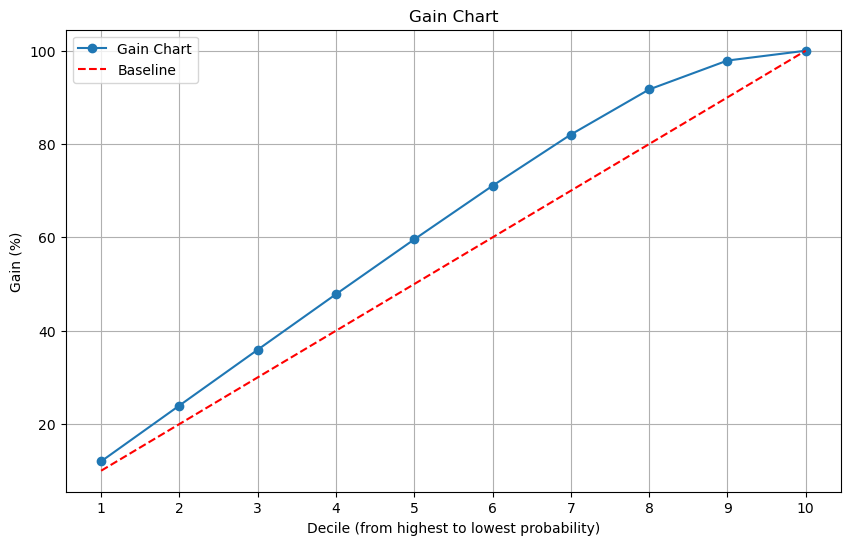

   Decile  Positives  Total  Cumulative Positives      Gain    Gain (%)
0       1      17400  17455                 17400  0.120063   12.006293
1       2      17346  17455                 34746  0.239753   23.975325
2       3      17325  17454                 52071  0.359299   35.929867
3       4      17247  17455                 69318  0.478306   47.830587
4       5      17020  17454                 86338  0.595747   59.574674
5       6      16650  17455                102988  0.710635   71.063454
6       7      15900  17455                118888  0.820347   82.034722
7       8      14004  17454                132892  0.916977   91.697717
8       9       8981  17455                141873  0.978948   97.894759
9      10       3051  17455                144924  1.000000  100.000000


In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Sort the DataFrame by predicted probabilities in descending order
merged_df = merged_df.sort_values(by="Positive Class Probability", ascending=False)

# Step 2: Assign deciles (Decile 10 has the highest probabilities)
merged_df['Decile'] = pd.qcut(
    merged_df['Positive Class Probability'], 
    q=10, 
    labels=False
) + 1

# Step 3: Flip decile labels so Decile 10 corresponds to the highest probabilities
merged_df['Decile'] = 11 - merged_df['Decile']

# Step 4: Calculate total positives in the dataset
total_positives = (merged_df['Actual'] == 1).sum()

# Step 5: Aggregate data by decile
gain_table = merged_df.groupby('Decile').agg(
    Positives=('Actual', lambda x: (x == 1).sum()),  # Count actual positives
    Total=('Actual', 'count')  # Total rows in each decile
).reset_index()

# Step 6: Calculate cumulative positives and gain percentage
gain_table['Cumulative Positives'] = gain_table['Positives'].cumsum()
gain_table['Gain'] = gain_table['Cumulative Positives'] / total_positives  # Gain = cumulative positives / total positives
gain_table['Gain (%)'] = gain_table['Gain'] * 100  # Convert gain to percentage

# Step 7: Calculate baseline curve
baseline_gain = np.linspace(0, 100, 11)  # Baseline evenly increases by 10% for each decile

# Step 8: Plot the gain chart with the baseline curve
plt.figure(figsize=(10, 6))
plt.plot(gain_table['Decile'], gain_table['Gain (%)'], marker='o', label="Gain Chart")
plt.plot(range(1, 11), baseline_gain[1:], linestyle='--', color='red', label="Baseline")
plt.title("Gain Chart")
plt.xlabel("Decile (from highest to lowest probability)")
plt.ylabel("Gain (%)")
plt.xticks(range(1, 11))
plt.grid()
plt.legend()
plt.show()

# Optional: Display the gain table for validation
print(gain_table)



*The model performs better than random but lacks strong predictive power in prioritizing positives in the early deciles, likely due to overconfidence from the neural network and CrossEntropy loss, which makes gains charts less insightful for evaluation.*

Neural networks are inherently good at classification tasks rather than producing probability rankings. Therefore, the **chart's subpar performance is less concerning**.

Gains charts are more valuable for models like logistic regression, which are better calibrated probabilistically. For neural networks, other metrics like ROC curves better represent performance.


#### Lift Chart

- Determines how effective the model is in ranking predictions.
- Helps decide how much of the population to target for maximum positive outcomes.

In [232]:
merged_df.head()

,index,Actual,Predicted,Correct,Name,Disbursement_Gross,Profit/Loss,Positive Class Probability,Decile
83164,866515,1,1,True,"FOURTH AVENUE PROPERTIES, INC.",400000,20000.0,1.0,1
36971,23454,1,1,True,PATEL FAMILY TRUST EPC,250000,12500.0,1.0,1
7522,823689,1,1,True,PRAGER WINERY & PORT WORKS INC,1091400,54570.0,1.0,1
85481,370574,1,1,True,"ST. HILAIRE SEED COMPANY, INC.",11000000,550000.0,1.0,1
27614,790013,1,1,True,INDUSTRIAL CONTAINER AND SUPPL,3726000,186300.0,1.0,1


**View average probability for each Decile**

In [235]:
list = []
for i in range(1,11):
    hi= merged_df[merged_df['Decile'] == i]
    hi = hi['Positive Class Probability'].mean()
    list.append(hi)

In [237]:
list

[0.9978815,
 0.9910127,
 0.97615224,
 0.9513827,
 0.90971863,
 0.83708256,
 0.7172047,
 0.50479215,
 0.218225,
 0.05241653]

*Since there are more 1s than 0s, it makes sense why the first 7 deciles are well about 50%*

**Create Lift Chart**

This code calculates and plots a lift chart to evaluate a model's ability to rank positive outcomes. It first sorts the data by predicted probabilities in descending order, then divides it into deciles (10 equal-sized groups). For each decile, it calculates the number of actual positives and the lift, which measures how much better the model performs compared to random guessing.

The lift is calculated as the ratio of positives in each decile (normalized by the decile size) to the overall proportion of positives in the dataset. A plot shows the lift curve for the model against a baseline of random performance. The function returns a summary table with decile metrics, making it a quick and visual way to assess model effectiveness.

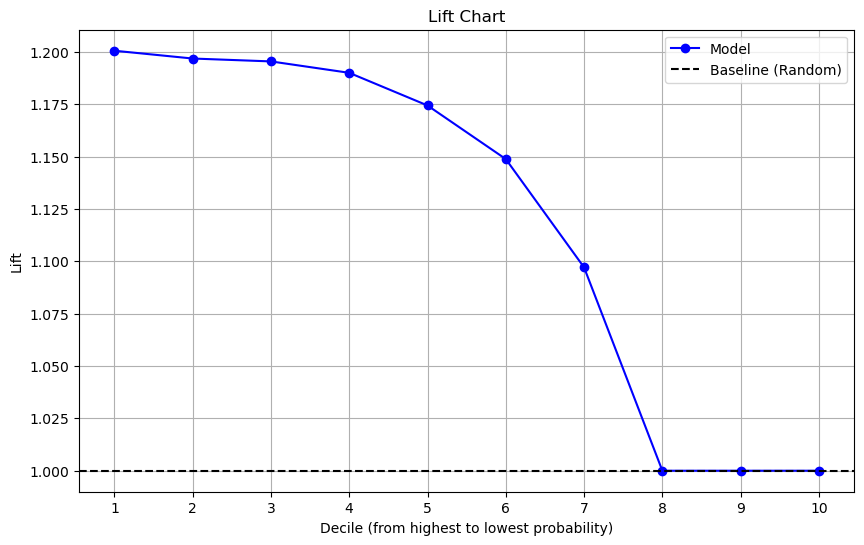

   Decile  Positives  Total      Lift
0       1      17400  17455  1.200609
1       2      17346  17455  1.196883
2       3      17325  17454  1.195502
3       4      17247  17455  1.190052
4       5      17021  17455  1.174457
5       6      16649  17454  1.148855
6       7      15900  17455  1.097108
7       8      14004  17454  1.000000
8       9       8981  17455  1.000000
9      10       3051  17455  1.000000


In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_lift_chart(df, prob_col, actual_col, num_deciles=10):
    # Sort by predicted probabilities in descending order
    df = df.sort_values(by=prob_col, ascending=False).reset_index(drop=True)
    
    # Add Decile column
    df['Decile'] = pd.qcut(df.index, num_deciles, labels=False, duplicates='drop') + 1  # Deciles from 1 to num_deciles
    
    # Group by Decile
    decile_summary = df.groupby('Decile').agg(
        Positives=(actual_col, 'sum'),  # Total actual positives in each decile
        Total=('Decile', 'count')      # Total samples in each decile
    ).reset_index()
    
    # Add cumulative metrics
    total_positives = df[actual_col].sum()
    decile_summary['Lift'] = (decile_summary['Positives'] / decile_summary['Total']) / (total_positives / len(df))
    
    # Ensure Lift values don't drop below 1.0 due to calculation issues
    decile_summary['Lift'] = np.maximum(decile_summary['Lift'], 1.0)

    # Plot the lift chart
    plt.figure(figsize=(10, 6))
    plt.plot(decile_summary['Decile'], decile_summary['Lift'], marker='o', color='blue', label='Model')
    plt.axhline(y=1, color='k', linestyle='--', label='Baseline (Random)')
    plt.title('Lift Chart')
    plt.xlabel('Decile (from highest to lowest probability)')
    plt.ylabel('Lift')
    plt.xticks(range(1, num_deciles + 1))  # Ensure all deciles are labeled on the x-axis
    plt.legend()
    plt.grid()
    plt.show()
    
    return decile_summary

# Replace with your actual dataframe and column names
# Example:
lift_table = generate_lift_chart(merged_df, prob_col='Positive Class Probability', actual_col='Actual')

# Uncomment to display the lift table if using in your environment
print(lift_table)



The subpar performance in the lower deciles isn’t concerning because:

MLPs excel at classification, not ranking.
The top deciles, where decisions matter, perform well.
Lift charts are sensitive to calibration, which doesn’t reflect the model’s true classification power.
Class imbalance naturally skews lower-decile performance, which is expected and doesn’t indicate a failure.
Real-world applications rarely rely on lower deciles.

#### ROC Curve

The AUC/ROC curve (Area Under the Receiver Operating Characteristic curve) is a tool used to evaluate the performance of a classification model. It measures how well the model distinguishes between positive and negative classes at various threshold settings.

AUC (Area Under the Curve):

The AUC is the area under the ROC curve, ranging from 0 to 1.
Interpretation:
AUC = 0.5: The model is no better than random guessing.
AUC = 1.0: The model perfectly distinguishes between positives and negatives.

In [248]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_auc_curve(y_true, y_probs):
    """
    Plots an AUC-ROC curve.
    
    Parameters:
    - y_true: Array of true binary labels (0 or 1).
    - y_probs: Array of predicted probabilities for the positive class.
    """
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    
    # Calculate the AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


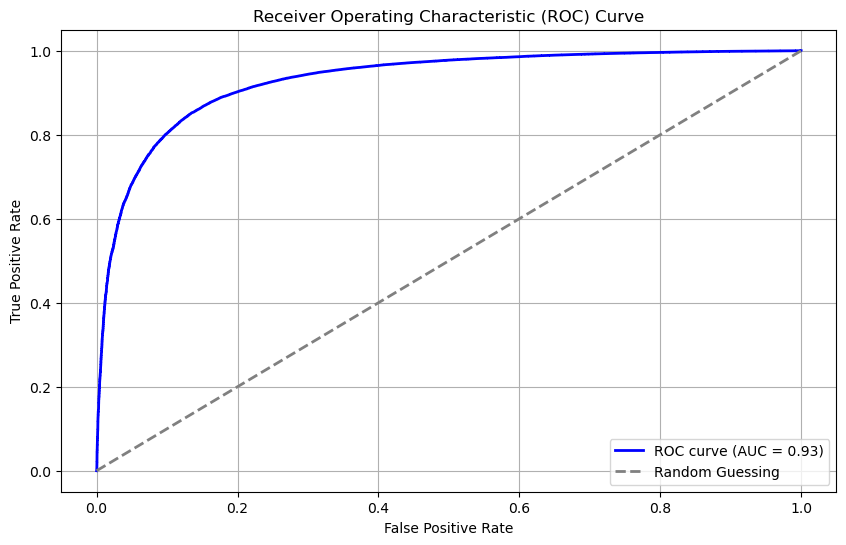

In [250]:
y_true = merged_df['Actual']  # Replace with the column of true labels
y_probs = merged_df['Positive Class Probability']  # Replace with the column of predicted probabilities
plot_auc_curve(y_true, y_probs)


The AUC of 0.93 is very high, meaning the model does an excellent job of distinguishing between paying and non-paying businesses. This suggests the model is highly reliable for making predictions about whether a business will pay the loan in full.

**In conclusion, this model is a robust tool for loan decision-making, allowing the business to confidently predict loan repayment outcomes**